---
# Sieci neuronowe - projekt 3

---
## Załadowanie bibliotek

In [177]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from enum import Enum
from sklearn.metrics import roc_auc_score, roc_curve, auc

---
## Załadowanie danych

In [165]:
temperature_data = pd.read_csv('temperature.csv')
wind_data = pd.read_csv('wind_speed.csv')
humidity_data = pd.read_csv('humidity.csv')
pressure_data = pd.read_csv('pressure.csv')

print(len(temperature_data))
temperature_data = temperature_data[temperature_data['datetime'] <= '2017-10-28']
temperature_data = temperature_data[temperature_data['datetime'] >= '2012-10-02']
wind_data = wind_data[wind_data['datetime'] <= '2017-10-28']
wind_data = wind_data[wind_data['datetime'] >= '2012-10-02']
print(len(temperature_data))


temperature_data = temperature_data.fillna(temperature_data.drop(['datetime'], axis=1).median())
wind_data = wind_data.fillna(wind_data.drop(['datetime'], axis=1).median())
humidity_data = humidity_data.fillna(humidity_data.drop(['datetime'], axis=1).median())
pressure_data = pressure_data.fillna(pressure_data.drop(['datetime'], axis=1).median())

temperature_data_hourly = temperature_data
humidity_data_hourly = humidity_data
pressure_data_hourly = pressure_data
wind_data_hourly = wind_data

temperature_data.head(10)
#wind_data.head(5)
#pressure_data.head(10)

45253
44448


,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
12,2012-10-02 00:00:00,284.608607,282.169397,289.331246,281.723376,291.814775,291.632042,293.293499,296.838297,285.948492,...,286.599371,289.040311,285.966046,287.641887,305.174695,303.887401,309.653462,304.4,304.4,303.5
13,2012-10-02 01:00:00,284.606564,282.178011,289.316871,281.715992,291.809434,291.641896,293.282535,296.861275,286.027886,...,286.692988,289.119575,285.979185,287.687467,304.928382,303.843574,309.569231,304.4,304.4,303.5
14,2012-10-02 02:00:00,284.604521,282.186626,289.302496,281.708608,291.804093,291.651750,293.271571,296.884254,286.107279,...,286.786604,289.198838,285.992325,287.733046,304.682069,303.799747,309.485000,304.4,304.4,303.5
15,2012-10-02 03:00:00,284.602477,282.195240,289.288122,281.701224,291.798752,291.661605,293.260606,296.907233,286.186673,...,286.880220,289.278102,286.005465,287.778626,304.435756,303.755921,309.400769,304.4,304.4,303.5
16,2012-10-02 04:00:00,284.600434,282.203855,289.273747,281.693840,291.793411,291.671459,293.249642,296.930212,286.266066,...,286.973837,289.357365,286.018604,287.824205,304.189443,303.712094,309.316538,304.4,304.4,303.5
17,2012-10-02 05:00:00,284.598390,282.212469,289.259372,281.686456,291.788070,291.681313,293.238678,296.953191,286.345459,...,287.067453,289.436629,286.031744,287.869785,303.943130,303.668267,309.232308,304.4,304.4,303.5
18,2012-10-02 06:00:00,284.596347,282.221084,289.244998,281.679072,291.782729,291.691167,293.227714,296.976170,286.424853,...,287.161069,289.515892,286.044883,287.915364,303.696817,303.624440,309.148077,304.4,304.4,303.5
19,2012-10-02 07:00:00,284.594304,282.229698,289.230623,281.671688,291.777387,291.701021,293.216750,296.999148,286.504246,...,287.254686,289.595156,286.058023,287.960944,303.450504,303.580614,309.063846,304.4,304.4,303.5
20,2012-10-02 08:00:00,284.592260,282.238313,289.216248,281.664304,291.772046,291.710875,293.205785,297.022127,286.583640,...,287.348302,289.674419,286.071162,288.006523,303.204191,303.536787,308.979615,304.4,304.4,303.5
21,2012-10-02 09:00:00,284.590217,282.246927,289.201874,281.656920,291.766705,291.720729,293.194821,297.045106,286.663033,...,287.441918,289.753683,286.084302,288.052103,302.957878,303.492960,308.895385,304.4,304.4,303.5


---
## Przetworzenie danych

In [166]:

def calculate_means_by_days(data):
    data['datetime'] = pd.to_datetime(data['datetime'])
    data['date'] = data['datetime'].dt.date
    data = data.drop('datetime', axis=1)
    data = data.groupby('date').mean().reset_index()
    data = data[['date'] + [col for col in data.columns if col != 'date']]

    return data

def check_max_wind_speed_by_days(data):
    data['datetime'] = pd.to_datetime(data['datetime'])
    data['date'] = data['datetime'].dt.date
    data = data.drop('datetime', axis=1)
    data = data.groupby('date').max().reset_index()
    data = data[['date'] + [col for col in data.columns if col != 'date']]

    return data

temperature_data = calculate_means_by_days(temperature_data)
wind_data = check_max_wind_speed_by_days(wind_data)

In [134]:
temperature_data.head(5)

,date,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01,284.523205,282.301681,289.266089,281.948324,291.736792,291.452266,293.247959,296.608817,285.529857,...,286.033533,288.344468,285.489732,287.101271,305.314084,303.469901,310.070609,303.601667,303.545833,302.624667
1,2012-10-02,286.145190,286.137728,292.958306,285.156888,295.890450,295.291472,297.248385,301.211968,289.771821,...,289.239595,290.892389,286.937931,289.013090,302.226773,302.787467,306.759071,303.900000,303.900000,302.675000
2,2012-10-03,285.528125,289.599792,296.929167,287.673958,299.008542,297.878750,300.691875,302.867083,291.205417,...,290.353542,290.065625,287.374583,289.020833,301.194375,301.687917,303.289583,301.561042,301.502500,301.258125
3,2012-10-04,284.373333,286.482500,295.687083,284.391667,295.997917,296.080833,301.820000,302.232917,293.096250,...,293.633750,291.987083,286.860833,290.043750,300.094167,299.940000,301.770208,299.139167,299.139167,298.924167
4,2012-10-05,283.757292,288.286042,290.635417,284.756250,292.948333,293.894375,300.628542,301.811250,292.829167,...,294.015833,294.043542,287.535208,289.517292,299.712083,300.153125,299.860000,298.877500,298.877500,297.547500


In [139]:
wind_data.head(5)

,date,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-02,0.0,8.0,7.0,2.0,3.0,6.0,5.0,6.0,4.0,...,5.0,6.0,7.0,5.0,6.0,5.0,9.0,6.0,6.0,2.0
1,2012-10-03,11.0,5.0,8.0,6.0,4.0,5.0,4.0,4.0,9.0,...,4.0,5.0,3.0,6.0,3.0,6.0,8.0,6.0,6.0,4.0
2,2012-10-04,3.0,12.0,7.0,8.0,2.0,5.0,6.0,3.0,7.0,...,5.0,3.0,5.0,5.0,4.0,10.0,9.0,5.0,5.0,4.0
3,2012-10-05,2.0,8.0,4.0,6.0,5.0,5.0,7.0,4.0,6.0,...,2.0,4.0,3.0,4.0,6.0,4.0,9.0,4.0,4.0,4.0
4,2012-10-06,2.0,10.0,8.0,6.0,2.0,4.0,5.0,3.0,8.0,...,4.0,4.0,6.0,4.0,6.0,5.0,6.0,4.0,4.0,4.0


---
## Analiza danych

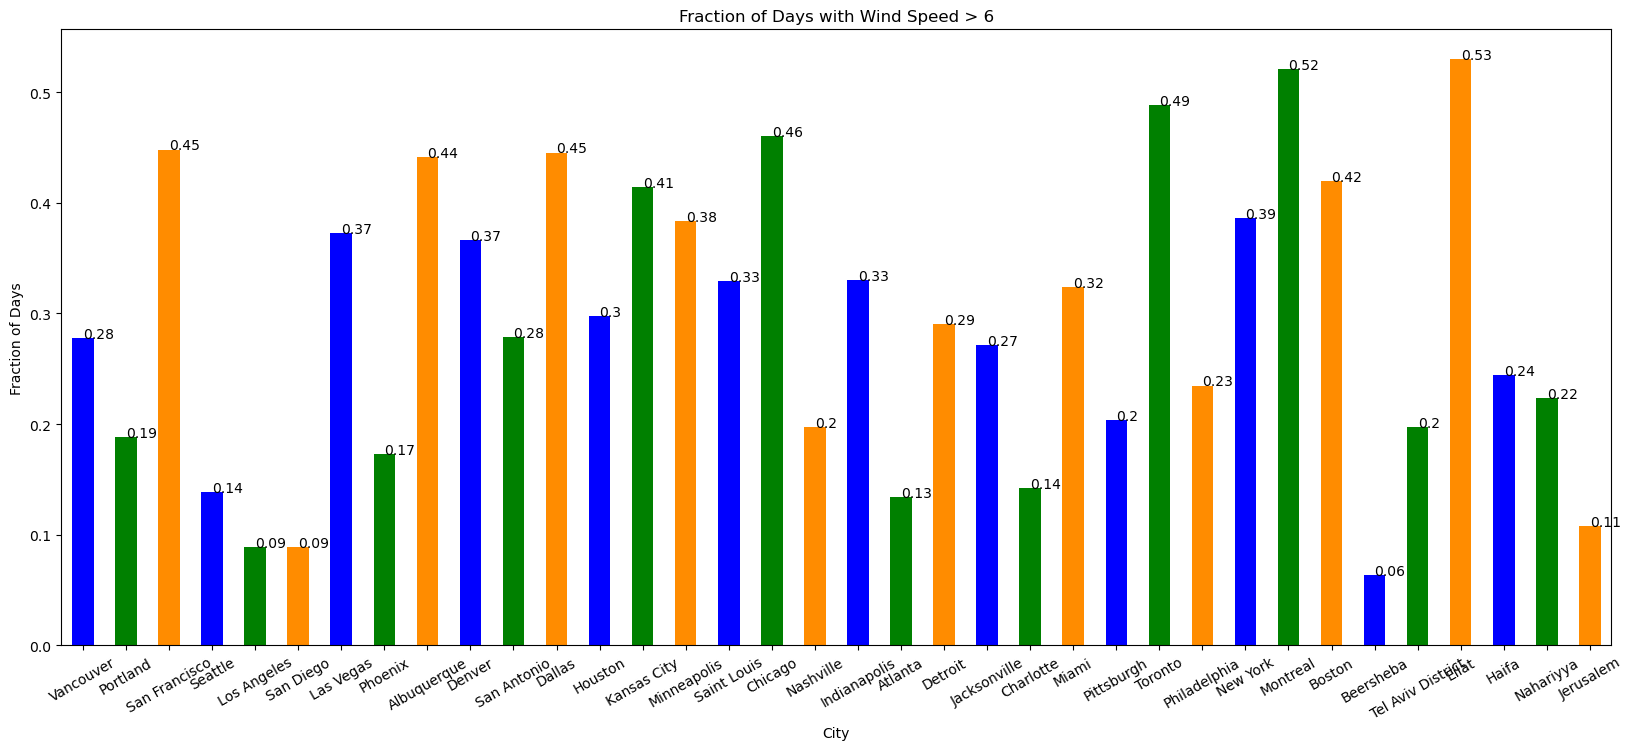

In [160]:
cities = wind_data.columns[1:38]
filtered_df = wind_data.iloc[:,0:38].copy()
filtered_df = filtered_df[cities].apply(lambda col: col > 6)

# Calculate the fraction of days where wind speed was higher than 6 for each city
fractions = filtered_df[cities].mean()

# Plot the fractions
plt.figure(figsize=(20,8))
fractions.plot(kind='bar', rot=30, color=['blue', 'green', 'darkorange'])
for index, value in enumerate(fractions):
    plt.text(index, value, str(np.round(value, 2)))
plt.title('Fraction of Days with Wind Speed > 6')
plt.xlabel('City')
plt.ylabel('Fraction of Days')
plt.show()

---
## Funkcje pomocnicze

In [116]:
def DrawData(X, y, plot_name):
    plt.style.use('dark_background')
    plt.figure(figsize=(10,5))
    axes = plt.gca()
    axes.set(xlabel="$X_1$", ylabel="$X_2$")
    plt.title(plot_name, fontsize=30)
    #plt.subplots_adjust(left=0.20)
    #plt.subplots_adjust(right=0.80)

    plt.scatter(X[0, :], X[1, :], c=y.ravel(), s=40, cmap=plt.cm.Spectral, edgecolors='black')

def DrawDataCompare(X, y, y_pred):
    plt.style.use('dark_background')
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    ax1.set(xlabel="$X_1$", ylabel="$X_2$")
    ax1.set_title('Actual labels', fontsize=20)
    ax1.scatter(X[0, :], X[1, :], c=y.ravel(), s=40, cmap=plt.cm.Spectral, edgecolors='black')
    
    ax2.set(xlabel="$X_1$", ylabel="$X_2$")
    ax2.set_title('Predicted labels', fontsize=20)
    ax2.scatter(X[0, :], X[1, :], c=y_pred.ravel(), s=40, cmap=plt.cm.Spectral, edgecolors='black')
    
    plt.tight_layout()
    plt.show()

def GetClassificationData(name):
    file = pd.read_csv(name, sep=",")

    input = np.array(file[["x", "y"]])
    results = np.array(file["cls"] - 1)

    num_classes = results.max() + 1
    
    return input.T, results.T, num_classes

def get_data_for_city(data, part):
    n = len(data)
    ind = int(n*part)
    data_train = data[:ind].tolist()
    data_test = data[ind+1:].tolist()
    return data_train, data_test

def get_data_for_city_count(data, count):
    ind = count
    data_train = data[:ind].tolist()
    data_test = data[ind+1:].tolist()
    return data_train, data_test

def get_full_data_for_city(data1, data2, data3, part):
    n = len(data1)
    ind = int(n*part)
    data1_train = data1[:ind].tolist()
    data1_test = data1[ind+1:].tolist()
    data2_train = data1[:ind].tolist()
    data2_test = data1[ind+1:].tolist()
    data3_train = data1[:ind].tolist()
    data3_test = data1[ind+1:].tolist()
    return [data1_train, data2_train, data3_train], [data1_test, data2_test, data3_test]

def get_windows_flat(data):
    n = len(data)
    windows_X = []
    windows_y = []

    for i in range(n - 4):
        window = data[i:i+3]
        windows_X.append(window)
        windows_y.append(data[i+4])

    return windows_X, windows_y

def get_windows(data):
    n = len(data[0])
    windows_X = []
    windows_y = []

    for i in range(n - 4):
        currWindow_X = []
        for j in range(3):
            window = data[j][i:i+3]
            currWindow_X += window
        windows_X.append(currWindow_X)
        windows_y.append(data[0][i+4])

    return windows_X, windows_y

def get_windows_hourly(data, data_aggr):
    n = len(data)
    windows_X = []
    windows_y = []

    day_count = int(n/24)
    for i in range(day_count - 4):
        window = data[i*24:(i+3)*24]
        windows_X.append(window)
        windows_y.append(data_aggr[i+4])

    return windows_X, windows_y

def convert_range(data, range_min, range_max):
    old_min = data.min()
    old_max = data.max()
    return (((data - old_min) * (range_max - range_min)) / (old_max - old_min)) + range_min

def calculate_auc(y_pred, y_true):
    auc = roc_auc_score(y_true, y_pred)
    return auc

def convert(x):
  return 1 if x >= 6 else 0

def one_hot(Y):
        one_hot_Y = np.zeros((Y.max() + 1, Y.size))
        one_hot_Y[Y, np.arange(Y.size)] = 1
        return one_hot_Y


---
## Funkcje aktywacji

In [102]:
class Sigmoid():
    @staticmethod
    def calculate(x):
        x = np.clip( x, -500, 500 )
        return 1 / (1 + np.exp(-x))

    def calculateDeriv(self, x):
        return x * (1 - x)

    
class ReLU():
    @staticmethod
    def calculate(x):
        return np.maximum(x, 0)
    
    @staticmethod
    def calculateDeriv(x):
        return x > 0
    
    
class CrossEntropy():
    @staticmethod
    def calculate(y, y_pred):
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
        return - (y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)).mean()

    @staticmethod
    def calculateDeriv(y, y_pred):
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
        return - (y / y_pred) + (1 - y) / (1 - y_pred)
    
class Softmax():
    @staticmethod
    def calculate(x):
        x = np.clip(x, 1e-15, 1 - 1e-15)
        e_x = np.exp(x - np.max(x, axis=0, keepdims=True))
        return e_x / np.sum(e_x, axis=0, keepdims=True)
    
    def calculateDeriv(self, x):
        value = self.calculate(x)
        return value * (1 - value)
    
class MSE:
    @staticmethod
    def calculate(y, y_pred):
        return ((y - y_pred) ** 2).mean()
    
    @staticmethod
    def calculateDeriv(y, y_pred):
        return -2*(y - y_pred) / y.shape[0]
    
class MAE:
    @staticmethod
    def calculate(y, y_pred):
        n = len(y)
        return np.sum(np.abs(y- y_pred)) / n
    
    @staticmethod
    def calculateDeriv(y, y_pred):
        n = len(y)
        return np.sign(y_pred - y) / n
        

class Tanh:
    @staticmethod
    def calculate(x):
        return np.tanh(x)

    @staticmethod
    def calculateDeriv(x):
        return 1 - x ** 2
    
class Linear:
    @staticmethod
    def calculate(x):
        return x

    @staticmethod
    def calculateDeriv(x):
        return np.ones_like(x)

---
## Sieć neuronowa

In [58]:
class NeuralNetworkStructure:
    def __init__(self, inputSize, outputSize, hiddenLayerSizes, hiddenLayerFunction, outputLayerFunction):
        self.inputSize = inputSize
        self.outputSize = outputSize
        self.hiddenLayerSizes = hiddenLayerSizes
        self.layersSizes = hiddenLayerSizes + [outputSize]
        self.activationFunction = [hiddenLayerFunction] * len(hiddenLayerSizes) + [outputLayerFunction]
        self.layerInput = [None] * len(self.layersSizes)
        self.layerOutput = [None] * len(self.layersSizes)

        self.initializeWeights()

    def initializeWeights(self):
        self.weights = []
        self.bias = []
        
        previousLayerSize = self.inputSize
        for layerSize in self.layersSizes:
            self.weights.append(np.random.rand(layerSize, previousLayerSize) - 0.5)
            self.bias.append(np.random.rand(layerSize, 1) - 0.5)
            previousLayerSize = layerSize
            

class NeuralNetwork:
    def __init__(self, neuralNetworkStructure, epochs, learningRate, lossFunction, batchSize = 0):
        self.structure = neuralNetworkStructure
        self.lossFunction = lossFunction
        self.learningRate = learningRate
        self.epochs = epochs
        self.batchSize = batchSize

    def Forward(self, X):
        previous_layer = X #np.reshape(X, (X.shape[0], 1))
        for id in range(len(self.structure.layersSizes)):
            self.structure.layerInput[id] = self.structure.weights[id].dot(previous_layer) + self.structure.bias[id]
            self.structure.layerOutput[id] = self.structure.activationFunction[id].calculate(self.structure.layerInput[id])
            previous_layer = self.structure.layerOutput[id]
        return previous_layer
    
    
    def Backward(self, X, ExpectedY, PredictedY):
        if ExpectedY.ndim < 2:
            ExpectedY = np.reshape(ExpectedY, (1, -1))
        previous_layer_error = self.lossFunction.calculateDeriv(ExpectedY, PredictedY)
        
        for id in range(len(self.structure.layersSizes) -1, -1, -1):    
            previous_layer_output = self.structure.layerOutput[id - 1] if id != 0 else X
            
            delta = previous_layer_error * self.structure.activationFunction[id].calculateDeriv(self.structure.layerOutput[id])
            deltaW = np.dot(delta, previous_layer_output.T) 
            deltaB = np.sum(delta, axis=1, keepdims=True)
            previous_layer_error = np.dot(self.structure.weights[id].T, delta)
                                        
            self.structure.weights[id] -= self.learningRate * deltaW / ExpectedY.shape[1]
            self.structure.bias[id] -= self.learningRate * deltaB / ExpectedY.shape[1]
    
    def one_hot(self, Y):
        one_hot_Y = np.zeros((Y.max() + 1, Y.size))
        one_hot_Y[Y, np.arange(Y.size)] = 1
        return one_hot_Y
    
    def Train(self, X, ExpectedY):
   
        predictedY = self.Forward(X)
        self.Backward(X, ExpectedY, predictedY)
    
    def Test(self, train_inputs, train_results, test_inputs, schuffleParts = True):
        train_inputs = np.array(train_inputs).T
        train_results = np.array(train_results).T
        test_inputs = np.array(test_inputs).T
        
        if self.batchSize != 0:
            partsCount = (int)(np.shape(train_inputs)[1] / self.batchSize)
        else:
            partsCount = 1
        
        inputParts = np.array_split(train_inputs, partsCount, 1)
        if train_results.ndim < 2:
            resultsParts = np.array_split(train_results, partsCount, 0)
        else:
            resultsParts = np.array_split(train_results, partsCount, 1)
        
        for epoch in range(self.epochs):
            parts_range = list(range(partsCount))
            
            if schuffleParts == True:
                np.random.shuffle(parts_range)
        
            for i in parts_range:
                self.Train(inputParts[i], resultsParts[i])
            
        return self.Forward(test_inputs) 
    
    def Predict(self, test_inputs):
        predictedY = self.Forward(test_inputs)
        return predictedY


---
## Regresja - przewidywanie temperatury - uśrednione wejście

In [108]:
import numpy as np
import pandas as pd

cities = ['Los Angeles', 'Vancouver', 'Miami', 'Tel Aviv District', 'Nahariyya', 'Haifa']

for city in cities:

    np.random.seed(0)

    prev_min = temperature_data[city].min()
    prev_max = temperature_data[city].max()

    temperature_data_converted = convert_range(temperature_data[city], -1, 1)
    humidity_data_converted = convert_range(humidity_data[city], -1, 1)
    pressure_data_converted = convert_range(pressure_data[city], -1, 1)

    data_train, data_test = get_full_data_for_city(temperature_data_converted, humidity_data_converted, pressure_data_converted, 0.7)

    train_windows_X, train_windows_y = get_windows(data_train)
    test_windows_X, test_windows_y = get_windows(data_test)

    nnS = NeuralNetworkStructure(
        inputSize = 9, 
        outputSize = 1, 
        hiddenLayerSizes = [32], 
        hiddenLayerFunction = ReLU(), 
        outputLayerFunction = Linear())

    nn = NeuralNetwork(  
        epochs = 1000, 
        learningRate = 0.01,
        neuralNetworkStructure = nnS,
        lossFunction = MAE(),
        batchSize=32)

    predictedPoints = nn.Test(train_windows_X, train_windows_y, test_windows_X)
    predictedPoints

    converted = convert_range(np.array(test_windows_y), prev_min, prev_max)
    predictedPoints = convert_range(np.array(predictedPoints), prev_min, prev_max)

    diff = converted - predictedPoints[0]
    err = abs(diff)

    predictedPoints
    print(f'City: {city}')
    print(f'Correct predictions [error <= 2]: {np.sum(err <= 2)}/{len(err)}, {np.sum(np.sum(err <=2))/len(err)*100}%')
    print(f'Max error: {np.max(err).round(2)}')
    print(f'Avg error: {np.mean(err).round(2)}')

City: Los Angeles
Correct predictions [error <= 2]: 333/551, 60.435571687840294%
Max error: 11.38
Avg error: 2.1517397956092474
City: Vancouver
Correct predictions [error <= 2]: 323/551, 58.620689655172406%
Max error: 8.99
Avg error: 2.047388183652062
City: Miami
Correct predictions [error <= 2]: 405/551, 73.502722323049%
Max error: 12.47
Avg error: 1.6145454782362736
City: Tel Aviv District
Correct predictions [error <= 2]: 416/551, 75.49909255898368%
Max error: 8.66
Avg error: 1.5809840591721618
City: Nahariyya
Correct predictions [error <= 2]: 355/551, 64.42831215970962%
Max error: 13.31
Avg error: 1.8718969404278207
City: Haifa
Correct predictions [error <= 2]: 380/551, 68.96551724137932%
Max error: 13.97
Avg error: 1.7204660200057686


---
## Regresja - przewidywanie temperatury - dokładne wejście

In [113]:
import numpy as np
import pandas as pd

cities = ['Los Angeles', 'Vancouver', 'Miami', 'Tel Aviv District', 'Nahariyya', 'Haifa']

for city in cities:

    np.random.seed(0)

    prev_min = temperature_data[city].min()
    prev_max = temperature_data[city].max()

    temperature_data_converted = convert_range(temperature_data[city], -1, 1)
    temperature_data_hourly_converted = convert_range(temperature_data_hourly[city], -1, 1)
    data_train, data_test = get_data_for_city(temperature_data_converted, 0.7)

    data_train_hourly, data_test_hourly = get_data_for_city_count(temperature_data_hourly_converted, len(data_train)*24)

    train_windows_X, train_windows_y = get_windows_hourly(data_train_hourly, data_train)
    test_windows_X, test_windows_y = get_windows_hourly(data_test_hourly, data_test)

    nnS = NeuralNetworkStructure(
        inputSize = 72, 
        outputSize = 1, 
        hiddenLayerSizes = [32], 
        hiddenLayerFunction = Tanh(), 
        outputLayerFunction = Linear())

    nn = NeuralNetwork(  
        epochs = 1000, 
        learningRate = 0.01,
        neuralNetworkStructure = nnS,
        lossFunction = MAE(),
        batchSize=32)

    predictedPoints = nn.Test(train_windows_X, train_windows_y, test_windows_X)
    predictedPoints

    converted = convert_range(np.array(test_windows_y), prev_min, prev_max)
    predictedPoints = convert_range(np.array(predictedPoints), prev_min, prev_max)

    diff = converted - predictedPoints[0]
    err = abs(diff)

    predictedPoints
    print(f'City: {city}')
    print(f'Correct predictions [error <= 2]: {np.sum(err <= 2)}/{len(err)}, {np.sum(np.sum(err <=2))/len(err)*100}%')
    print(f'Max error: {np.max(err).round(2)}')
    print(f'Avg error: {np.mean(err).round(2)}')

City: Los Angeles
Correct predictions [error <= 2]: 273/551, 49.546279491833026%
Max error: 12.86
Avg error: 2.56
City: Vancouver
Correct predictions [error <= 2]: 306/551, 55.53539019963702%
Max error: 11.7
Avg error: 2.17
City: Miami
Correct predictions [error <= 2]: 342/551, 62.06896551724138%
Max error: 12.03
Avg error: 2.06
City: Tel Aviv District
Correct predictions [error <= 2]: 349/551, 63.33938294010889%
Max error: 10.42
Avg error: 1.93
City: Nahariyya
Correct predictions [error <= 2]: 281/551, 50.99818511796733%
Max error: 12.01
Avg error: 2.37
City: Haifa
Correct predictions [error <= 2]: 304/551, 55.172413793103445%
Max error: 13.99
Avg error: 2.11


---
## Klasyfikacja - przewidywanie wiatru - wejście jako etykiety (uśrednione)

In [170]:
import numpy as np
import pandas as pd

cities = ['Eilat', 'Montreal', 'Toronto', 'Chicago', 'Dallas', 'Albuquerque']

for city in cities:
    
    np.random.seed(0)

    wind_data_class = np.apply_along_axis(np.vectorize(convert), -1, wind_data[city])

    wind_data_train, wind_data_test = get_data_for_city(wind_data_class, 0.7)

    train_windows_X, train_windows_y = get_windows_flat(wind_data_train)
    test_windows_X, test_windows_y = get_windows_flat(wind_data_test)

    train_windows_y = one_hot(np.array(train_windows_y).astype(int)).T
    train_windows_y

    nnS = NeuralNetworkStructure(
        inputSize = 3, 
        outputSize = 2, 
        hiddenLayerSizes = [12], 
        hiddenLayerFunction = ReLU(), 
        outputLayerFunction = Softmax())

    nn = NeuralNetwork(  
        epochs = 1000, 
        learningRate = 0.01,
        neuralNetworkStructure = nnS,
        lossFunction = CrossEntropy(),
        batchSize=32)

    predictedPoints = nn.Test(train_windows_X, train_windows_y, test_windows_X)
    diff = np.argmax(predictedPoints, 0) == test_windows_y
    auc_val = calculate_auc(np.argmax(predictedPoints, 0), test_windows_y)
    print(f'{city}: Correct predictions: {np.sum(diff)}/{len(diff)} = {(np.sum(diff)/len(diff)*100).round(2)}%\t\t AUC:{auc_val.round(2)}')

Eilat: Correct predictions: 476/551 = 86.39%		 AUC:0.75
Montreal: Correct predictions: 382/551 = 69.33%		 AUC:0.5
Toronto: Correct predictions: 386/551 = 70.05%		 AUC:0.6
Chicago: Correct predictions: 393/551 = 71.32%		 AUC:0.57
Dallas: Correct predictions: 387/551 = 70.24%		 AUC:0.56
Albuquerque: Correct predictions: 344/551 = 62.43%		 AUC:0.63


---
## Klasyfikacja - przewidywanie wiatru - wejście jako dane liczbowe

In [138]:
import numpy as np
import pandas as pd

for city in cities:
    
    np.random.seed(0)

    wind_data_class = np.apply_along_axis(np.vectorize(convert), -1, wind_data[city])

    wind_data_train, wind_data_test = get_data_for_city(wind_data[city], 0.5)

    train_windows_X, train_windows_y = get_windows_flat(wind_data_train)
    test_windows_X, test_windows_y = get_windows_flat(wind_data_test)

    train_windows_y = np.apply_along_axis(np.vectorize(convert), -1, train_windows_y)
    test_windows_y = np.apply_along_axis(np.vectorize(convert), -1, test_windows_y)
    train_windows_y = one_hot(np.array(train_windows_y).astype(int)).T
    train_windows_y

    nnS = NeuralNetworkStructure(
        inputSize = 3, 
        outputSize = 2, 
        hiddenLayerSizes = [12], 
        hiddenLayerFunction = Tanh(), 
        outputLayerFunction = Softmax())

    nn = NeuralNetwork(  
        epochs = 1000, 
        learningRate = 0.01,
        neuralNetworkStructure = nnS,
        lossFunction = CrossEntropy(),
        batchSize=32)

    predictedPoints = nn.Test(train_windows_X, train_windows_y, test_windows_X)
    diff = np.argmax(predictedPoints, 0) == test_windows_y
    auc_val = calculate_auc(np.argmax(predictedPoints, 0), test_windows_y)
    print(f'{city}: Correct predictions: {np.sum(diff)}/{len(diff)} = {(np.sum(diff)/len(diff)*100).round(2)}%\t\t AUC:{auc_val.round(2)}')

Los Angeles: Correct predictions: 603/921 = 65.47%		 AUC:0.5
Vancouver: Correct predictions: 437/921 = 47.45%		 AUC:0.5
Miami: Correct predictions: 573/921 = 62.21%		 AUC:0.53
Tel Aviv District: Correct predictions: 515/921 = 55.92%		 AUC:0.51
Nahariyya: Correct predictions: 450/921 = 48.86%		 AUC:0.5
Haifa: Correct predictions: 445/921 = 48.32%		 AUC:0.5


---
## Klasyfikacja - przewidywanie wiatru - wejście godzinami

In [ ]:
import numpy as np
import pandas as pd

for city in cities:
    
    np.random.seed(0)

    wind_data_train, wind_data_test = get_data_for_city(wind_data[city], 0.5)
    wind_data_train_hourly, wind_data_test_hourly = get_data_for_city_count(wind_data_hourly[city], len(wind_data_train)*24)

    train_windows_X, train_windows_y = get_windows_hourly(wind_data_train_hourly, wind_data_train)
    test_windows_X, test_windows_y = get_windows_hourly(wind_data_test_hourly, wind_data_test)

    train_windows_y = np.apply_along_axis(np.vectorize(convert), -1, train_windows_y)
    test_windows_y = np.apply_along_axis(np.vectorize(convert), -1, test_windows_y)
    train_windows_y = one_hot(np.array(train_windows_y).astype(int)).T


    nnS = NeuralNetworkStructure(
        inputSize = 72, 
        outputSize = 2, 
        hiddenLayerSizes = [36], 
        hiddenLayerFunction = ReLU(), 
        outputLayerFunction = Softmax())

    nn = NeuralNetwork(  
        epochs = 1000, 
        learningRate = 0.01,
        neuralNetworkStructure = nnS,
        lossFunction = CrossEntropy(),
        batchSize=32)

    predictedPoints = nn.Test(train_windows_X, train_windows_y, test_windows_X)
    diff = np.argmax(predictedPoints, 0) == test_windows_y
    aucc = calculate_auc(np.argmax(predictedPoints, 0), test_windows_y)
    print(f'{city}: Correct predictions: {np.sum(diff)}/{len(diff)} = {(np.sum(diff)/len(diff)*100).round(2)}%\t\t AUC:{aucc.round(2)}')

    fpr, tpr, thresholds = roc_curve(test_windows_y, np.argmax(predictedPoints, 0))

    # Calculate the Area Under the Curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

---
## Klasyfikacja - przewiydwanie wiatru - funkcje aktywacji

In [327]:
import numpy as np
import pandas as pd


def convert(x):
  return 1 if x >= 6 else 0

cities = wind_data.columns
cities = cities.drop(['date'])

for city in cities:
    
    np.random.seed(0)

    wind_data_class = np.apply_along_axis(np.vectorize(convert), -1, wind_data[city])

    windows_X, windows_y = get_windows(wind_data_class)

    train_windows_X, test_windows_X, train_windows_y, test_windows_y = train_test_split(windows_X, windows_y, test_size=0.7, random_state=0)

    def one_hot(Y):
        one_hot_Y = np.zeros((Y.max() + 1, Y.size))
        one_hot_Y[Y, np.arange(Y.size)] = 1
        return one_hot_Y

    train_windows_y = one_hot(np.array(train_windows_y).astype(int)).T
    train_windows_y

    functions = [Sigmoid(), Tanh(), ReLU()]
    
    for function in functions:
        
        nnS = NeuralNetworkStructure(
            inputSize = 3, 
            outputSize = 2, 
            hiddenLayerSizes = [64], 
            hiddenLayerFunction = function, 
            outputLayerFunction = Softmax())

        nn = NeuralNetwork(  
            epochs = 1000, 
            learningRate = 0.01,
            neuralNetworkStructure = nnS,
            lossFunction = CrossEntropy(),
            batchSize=32)

        predictedPoints = nn.Test(train_windows_X, train_windows_y, test_windows_X)
        diff = np.argmax(predictedPoints, 0) == test_windows_y
        print(f'{city}: {type(function)} Correct predictions: {np.sum(diff)}/{len(diff)}, {np.sum(diff)/len(diff)*100}%')

Vancouver: <class '__main__.Sigmoid'> Correct predictions: 806/1319, 61.10689916603488%
Vancouver: <class '__main__.Tanh'> Correct predictions: 813/1319, 61.63760424564063%
Vancouver: <class '__main__.ReLU'> Correct predictions: 813/1319, 61.63760424564063%
Portland: <class '__main__.Sigmoid'> Correct predictions: 942/1319, 71.4177407126611%
Portland: <class '__main__.Tanh'> Correct predictions: 915/1319, 69.3707354056103%
Portland: <class '__main__.ReLU'> Correct predictions: 942/1319, 71.4177407126611%
San Francisco: <class '__main__.Sigmoid'> Correct predictions: 1015/1319, 76.95223654283548%
San Francisco: <class '__main__.Tanh'> Correct predictions: 995/1319, 75.43593631539045%
San Francisco: <class '__main__.ReLU'> Correct predictions: 1004/1319, 76.11827141774071%
Seattle: <class '__main__.Sigmoid'> Correct predictions: 972/1319, 73.69219105382867%
Seattle: <class '__main__.Tanh'> Correct predictions: 959/1319, 72.70659590598939%
Seattle: <class '__main__.ReLU'> Correct predicti

KeyboardInterrupt: 

In [315]:
import numpy as np
import pandas as pd

cities = wind_data.columns
cities = cities.drop(['date'])

for city in cities:

    np.random.seed(0)

    prev_min = wind_data[city].min()
    prev_max = wind_data[city].max()

    wind_data_regression = convert_range(wind_data[city], 0, 1)

    windows_X, windows_y = get_windows(wind_data_regression)

    from sklearn.model_selection import train_test_split
    train_windows_X, test_windows_X, train_windows_y, test_windows_y = train_test_split(windows_X, windows_y, test_size=0.7, random_state=0)

    nnS = NeuralNetworkStructure(
        inputSize = 3, 
        outputSize = 1, 
        hiddenLayerSizes = [64], 
        hiddenLayerFunction = Tanh(), 
        outputLayerFunction = Linear())

    nn = NeuralNetwork(  
        epochs = 3000, 
        learningRate = 0.01,
        neuralNetworkStructure = nnS,
        lossFunction = MAE(),
        batchSize=32)

    predictedPoints = nn.Test(train_windows_X, train_windows_y, test_windows_X)
    predictedPoints

    converted = convert_range(np.array(test_windows_y), prev_min, prev_max)
    predictedPoints = convert_range(np.array(predictedPoints), prev_min, prev_max)

    diff = (converted >= 6) == (predictedPoints[0] >= 6) 

    print(f'{city} Correct predictions: {np.sum(diff)}/{len(diff)}, {np.sum(diff)/len(diff)*100}%')

Vancouver Correct predictions: 662/1319, 50.18953752843063%
Portland Correct predictions: 686/1319, 52.00909780136467%
San Francisco Correct predictions: 1082/1319, 82.03184230477635%
Seattle Correct predictions: 485/1319, 36.770280515542076%
Los Angeles Correct predictions: 809/1319, 61.33434420015163%
San Diego Correct predictions: 1064/1319, 80.66717210007582%
Las Vegas Correct predictions: 848/1319, 64.29112964366944%


KeyboardInterrupt: 

---
## Wykorzystywanie predykcji dla dnia dzisiejszego jako wejścia dla predykcji na jutro

In [198]:
cities = ['Eilat', 'Montreal', 'Toronto', 'Chicago', 'Dallas', 'Albuquerque']

for city in cities:
    
    np.random.seed(0)

    wind_data_class = np.apply_along_axis(np.vectorize(convert), -1, wind_data[city])

    wind_data_train, wind_data_test = get_data_for_city(wind_data_class, 0.7)

    train_windows_X, train_windows_y = get_windows_flat(wind_data_train)
    test_windows_X, test_windows_y = get_windows_flat(wind_data_test)

    train_windows_y = one_hot(np.array(train_windows_y).astype(int)).T

    nnS = NeuralNetworkStructure(
        inputSize = 3, 
        outputSize = 2, 
        hiddenLayerSizes = [12], 
        hiddenLayerFunction = ReLU(), 
        outputLayerFunction = Softmax())

    nn = NeuralNetwork(  
        epochs = 1000, 
        learningRate = 0.01,
        neuralNetworkStructure = nnS,
        lossFunction = CrossEntropy(),
        batchSize=32)
    

    predictedPoints = nn.Test(train_windows_X, train_windows_y, train_windows_X + test_windows_X)
    y_pred = np.argmax(predictedPoints, 0)
    print(y_pred.mean())
    y_pred_for_train = y_pred[0:len(train_windows_X)]
    y_pred_for_test = y_pred[len(train_windows_X):]
    #diff = np.argmax(predictedPoints, 0) == test_windows_y
    #auc_val = calculate_auc(np.argmax(predictedPoints, 0), test_windows_y)
    #print(f'{city}: Correct predictions: {np.sum(diff)}/{len(diff)} = {(np.sum(diff)/len(diff)*100).round(2)}%\t\t AUC:{auc_val.round(2)}')

    # druga sieć
    train_windows_X = train_windows_X[1:]
    train_windows_y = train_windows_y[1:]
    for i in range(len(train_windows_X)):
        train_windows_X[i].append(y_pred_for_train[i])

    test_windows_X = test_windows_X[1:]
    test_windows_y = test_windows_y[1:]
    for i in range(len(test_windows_X)):
        test_windows_X[i].append(y_pred_for_test[i])

    nnS = NeuralNetworkStructure(
        inputSize = 4, 
        outputSize = 2, 
        hiddenLayerSizes = [16], 
        hiddenLayerFunction = Sigmoid(), 
        outputLayerFunction = Sigmoid())

    nn = NeuralNetwork(  
        epochs = 1000, 
        learningRate = 0.01,
        neuralNetworkStructure = nnS,
        lossFunction = CrossEntropy(),
        batchSize=32)
    
    predictedPoints = nn.Test(train_windows_X, train_windows_y, test_windows_X)
    diff = np.argmax(predictedPoints, 0) == test_windows_y
    auc_val = calculate_auc(np.argmax(predictedPoints, 0), test_windows_y)
    print(f'{city}: Correct predictions: {np.sum(diff)}/{len(diff)} = {(np.sum(diff)/len(diff)*100).round(2)}%\t\t AUC:{auc_val.round(2)}')



0.8024959305480195
Eilat: Correct predictions: 475/550 = 86.36%		 AUC:0.76
1.0
Montreal: Correct predictions: 381/550 = 69.27%		 AUC:0.5
0.6771568095496473
Toronto: Correct predictions: 400/550 = 72.73%		 AUC:0.57
0.8193163320672816
Chicago: Correct predictions: 394/550 = 71.64%		 AUC:0.57
0.8686923494302767
Dallas: Correct predictions: 381/550 = 69.27%		 AUC:0.56
0.3684210526315789
Albuquerque: Correct predictions: 377/550 = 68.55%		 AUC:0.65
